In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *

In [2]:
data=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\23\case_time_series.csv")
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [3]:
data.columns

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [4]:
data.dtypes

Date               object
Daily Confirmed     int64
Total Confirmed     int64
Daily Recovered     int64
Total Recovered     int64
Daily Deceased      int64
Total Deceased      int64
dtype: object

In [5]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [6]:
data_jly=data[153:]
data_jly

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
153,01 July,19429,605224,12064,359904,438,17849
154,02 July,21947,627171,19999,379903,378,18227
155,03 July,22718,649889,14417,394320,444,18671
156,04 July,24018,673907,14746,409066,611,19282
157,05 July,23942,697849,15829,424895,421,19703
158,06 July,22500,720349,15315,440210,473,20176
159,07 July,23147,743496,16836,457046,479,20655
160,08 July,25561,769057,19508,476554,492,21147
161,09 July,25790,794847,19408,495962,479,21626
162,10 July,27762,822609,20289,516251,520,22146


In [7]:
count1=0
for i in list(data_jly.columns):
    if((True== "NaN" in data_jly[i])or (True == "" in data_jly[i]) or (True == " " in data_jly[i]) or (True == "?" in  data_jly[i])or (True == "####" in data_jly[i])):
        count1=count1+1
if(count1):
    print("yes")
    

In [8]:
#data_mrc.to_excel("coviddata_mar.xlsx")

In [9]:
data_jly.reset_index(inplace = True, drop = True) 
data_jly.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01 July,19429,605224,12064,359904,438,17849
1,02 July,21947,627171,19999,379903,378,18227
2,03 July,22718,649889,14417,394320,444,18671
3,04 July,24018,673907,14746,409066,611,19282
4,05 July,23942,697849,15829,424895,421,19703


In [10]:
for i in range(len(data_jly)):
    data_jly["Date"][i]=data_jly["Date"][i].strip(" July")
    

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
for i in range(len(data_jly)):
    data_jly["Date"][i]="2020-07-"+data_jly["Date"][i]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
data_jly['Date'] = data_jly['Date'].astype('datetime64[ns]') 
data_jly.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,19429,605224,12064,359904,438,17849
1,2020-07-02,21947,627171,19999,379903,378,18227
2,2020-07-03,22718,649889,14417,394320,444,18671
3,2020-07-04,24018,673907,14746,409066,611,19282
4,2020-07-05,23942,697849,15829,424895,421,19703


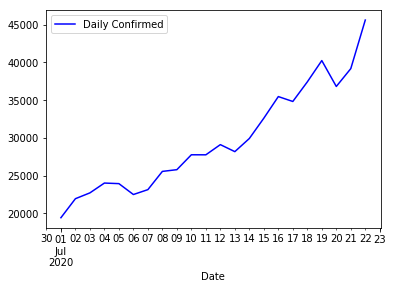

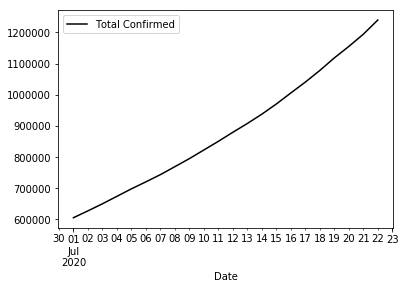

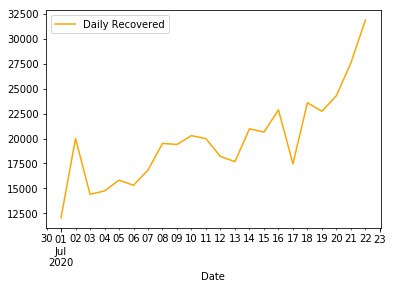

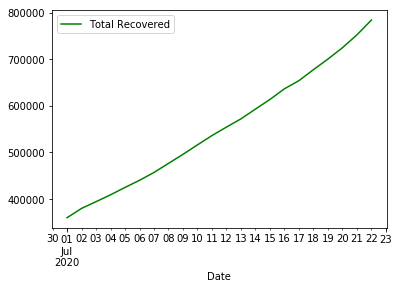

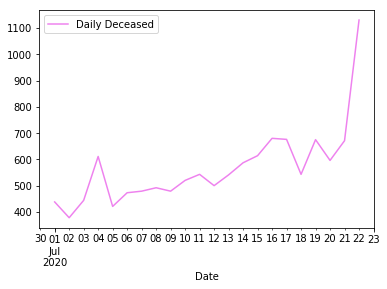

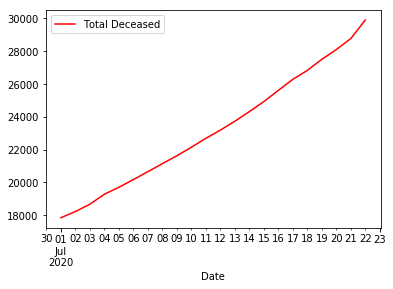

In [13]:
colss=list(data_jly.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_jly.plot(x="Date",y=m,color=n)

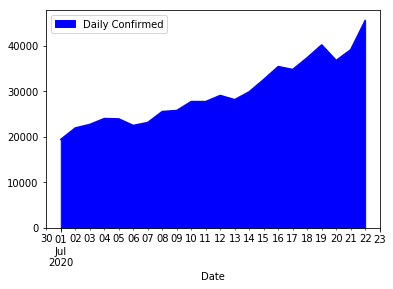

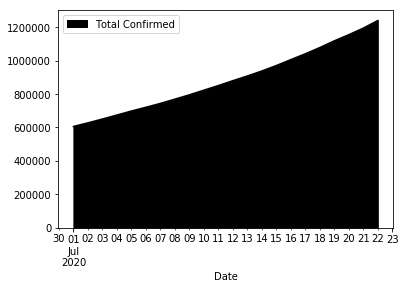

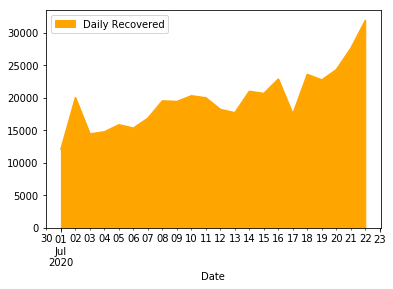

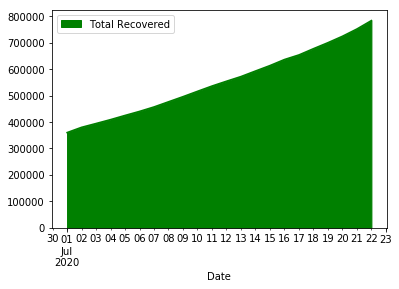

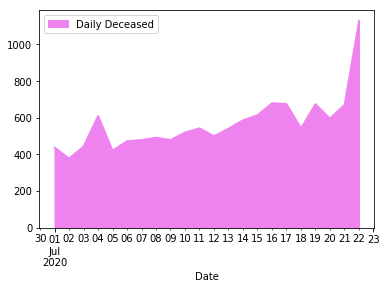

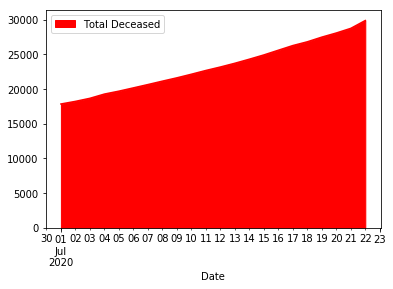

In [14]:
colss=list(data_jly.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_jly.plot(x="Date",y=m,color=n,kind="area")

In [15]:
datajly_diff=data_jly.copy()
datajly_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,19429,605224,12064,359904,438,17849
1,2020-07-02,21947,627171,19999,379903,378,18227
2,2020-07-03,22718,649889,14417,394320,444,18671
3,2020-07-04,24018,673907,14746,409066,611,19282
4,2020-07-05,23942,697849,15829,424895,421,19703


In [16]:
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
existing_cols=list(datajly_diff.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[18256,585795,12565,347840,506,17411]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    datajly_diff[i]=list(range(len(datajly_diff)))
    datajly_diff[i][0]=datajly_diff[j][0]-l
    for k in range(0,len(datajly_diff)-1):
        datajly_diff[i][k+1]=datajly_diff[j][k+1]-datajly_diff[j][k]
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [17]:
datajly_diff.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
17,2020-07-18,37411,1077873,23583,677662,543,26830,2591,37411,6107,23583,-133,543
18,2020-07-19,40235,1118108,22730,700392,675,27505,2824,40235,-853,22730,132,675
19,2020-07-20,36806,1154914,24303,724695,596,28101,-3429,36806,1573,24303,-79,596
20,2020-07-21,39170,1194084,27589,752284,671,28772,2364,39170,3286,27589,75,671
21,2020-07-22,45601,1239685,31874,784158,1130,29902,6431,45601,4285,31874,459,1130


In [18]:
datajly_diff["Total Confirmed"][12]-datajly_diff["Total Confirmed"][11]==datajly_diff["Total_Confirmed_Diff"][12]

True

In [19]:
datajly_diff.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,29722.272727,8.854725e+05,19832.636364,552435.681818,567.772727,23243.000000,1242.954545,29722.272727,877.681818,19832.636364,28.363636,567.772727
std,7066.442617,1.937617e+05,4541.560667,128168.186318,153.801645,3629.653165,1990.734286,7066.442617,3142.357386,4541.560667,125.842890,153.801645
min,19429.000000,6.052240e+05,12064.000000,359904.000000,378.000000,17849.000000,-3429.000000,19429.000000,-5582.000000,12064.000000,-190.000000,378.000000
25%,23961.000000,7.261358e+05,16996.000000,444419.000000,479.000000,20295.750000,53.500000,23961.000000,-510.750000,16996.000000,-35.500000,479.000000
50%,27970.000000,8.649190e+05,19744.500000,545331.000000,542.000000,22939.000000,1324.500000,27970.000000,605.000000,19744.500000,25.000000,542.000000
75%,35306.000000,1.031757e+06,22291.750000,649710.000000,613.250000,26118.000000,2492.000000,35306.000000,2559.250000,22291.750000,62.500000,613.250000
max,45601.000000,1.239685e+06,31874.000000,784158.000000,1130.000000,29902.000000,6431.000000,45601.000000,7935.000000,31874.000000,459.000000,1130.000000


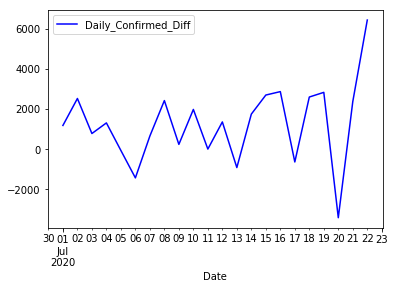

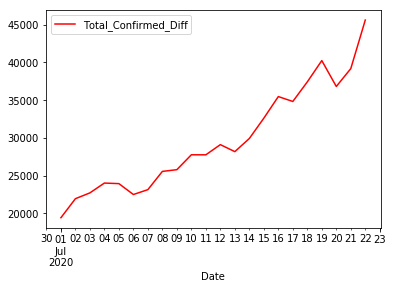

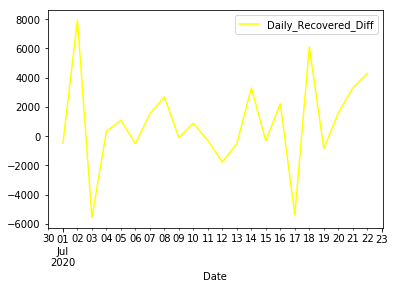

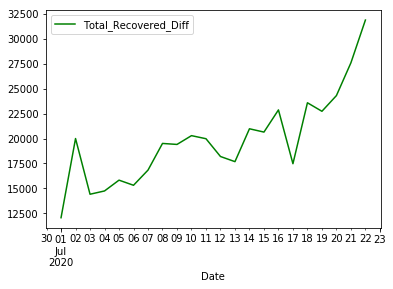

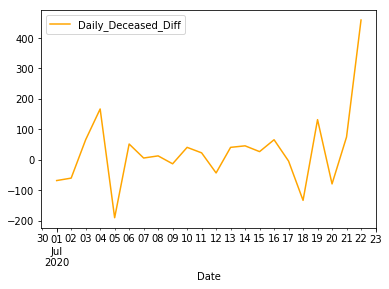

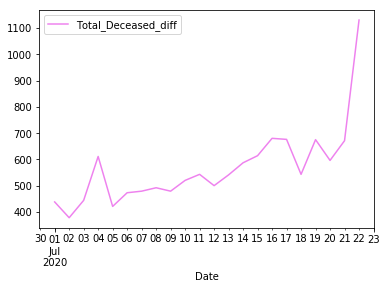

In [20]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    datajly_diff.plot(x="Date",y=i,color=j)

In [21]:
datajly_ratio=data_jly.copy()
datajly_ratio.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,19429,605224,12064,359904,438,17849
1,2020-07-02,21947,627171,19999,379903,378,18227
2,2020-07-03,22718,649889,14417,394320,444,18671
3,2020-07-04,24018,673907,14746,409066,611,19282
4,2020-07-05,23942,697849,15829,424895,421,19703


In [22]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(datajly_ratio.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[18256,585795,12565,347840,506,17411]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    datajly_ratio[i]=list(range(len(datajly_ratio)))
    datajly_ratio[i][0]=round(datajly_ratio[j][0]/l,2)
    tmp=[]
    tmp.append(datajly_ratio[i][0])
    for k in range(0,len(datajly_ratio)-1):
        tmp.append(round(datajly_ratio[j][k+1]/datajly_ratio[j][k],2))
    datajly_ratio[i]=tmp
datajly_ratio.head()
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-07-01,19429,605224,12064,359904,438,17849,1.00,1.00,0.00,1.00,0.00,1.00
1,2020-07-02,21947,627171,19999,379903,378,18227,1.13,1.04,1.66,1.06,0.86,1.02
2,2020-07-03,22718,649889,14417,394320,444,18671,1.04,1.04,0.72,1.04,1.17,1.02
3,2020-07-04,24018,673907,14746,409066,611,19282,1.06,1.04,1.02,1.04,1.38,1.03
4,2020-07-05,23942,697849,15829,424895,421,19703,1.00,1.04,1.07,1.04,0.69,1.02


In [23]:
round(datajly_ratio["Total Confirmed"][4]/datajly_ratio["Total Confirmed"][3],2)==datajly_ratio["Total_Confirmed_Ratio"][4]

True

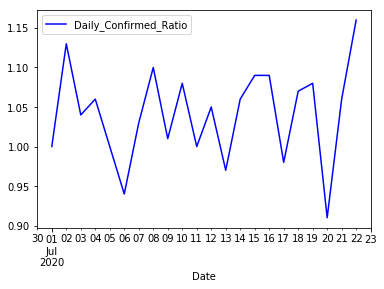

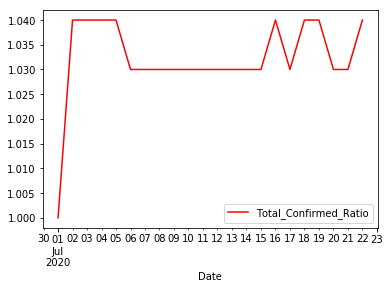

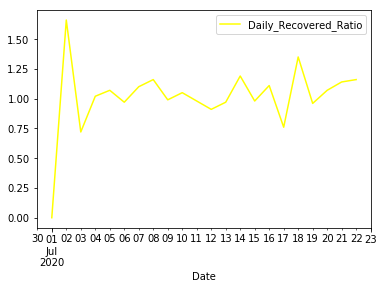

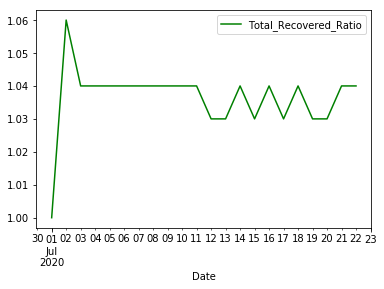

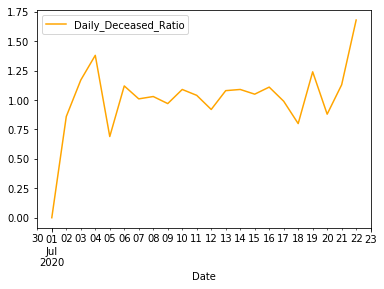

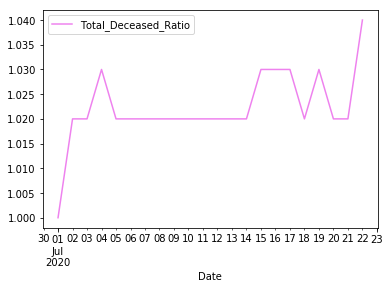

In [24]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    datajly_ratio.plot(x="Date",y=i,color=j)

In [26]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(datajly_ratio.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[18256,585795,12565,347840,506,17411]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    datajly_ratio[i]=list(range(len(datajly_ratio)))
    datajly_ratio[i][0]=datajly_ratio[j][0]/l
    tmp=[]
    tmp.append(datajly_ratio[i][0])
    for k in range(0,len(datajly_ratio)-1):
        tmp.append(datajly_ratio[j][k+1]/datajly_ratio[j][k])
    datajly_ratio[i]=tmp
datajly_ratio.head()
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-07-01,19429,605224,12064,359904,438,17849,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,2020-07-02,21947,627171,19999,379903,378,18227,1.129600,1.036263,1.657742,1.055568,0.863014,1.021178
2,2020-07-03,22718,649889,14417,394320,444,18671,1.035130,1.036223,0.720886,1.037949,1.174603,1.024359
3,2020-07-04,24018,673907,14746,409066,611,19282,1.057223,1.036957,1.022820,1.037396,1.376126,1.032725
4,2020-07-05,23942,697849,15829,424895,421,19703,0.996836,1.035527,1.073444,1.038695,0.689034,1.021834


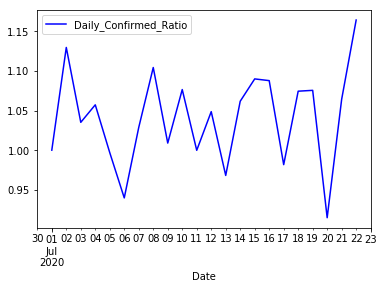

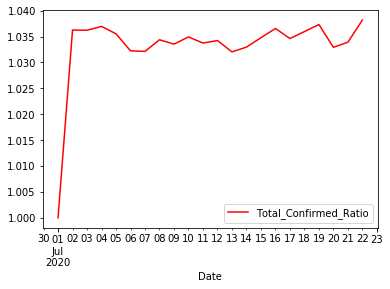

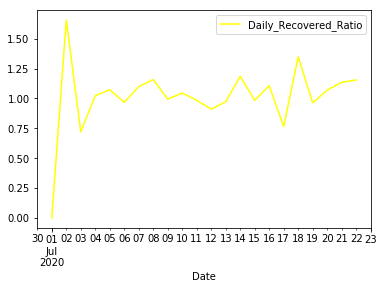

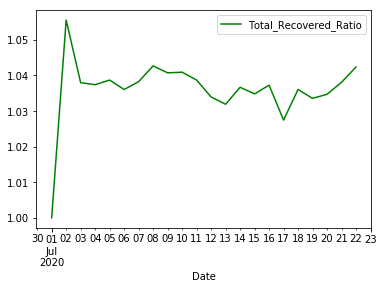

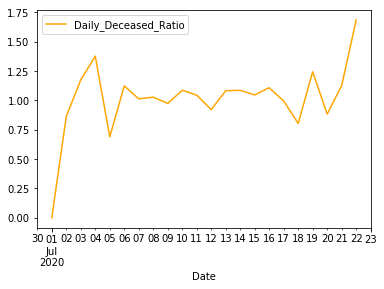

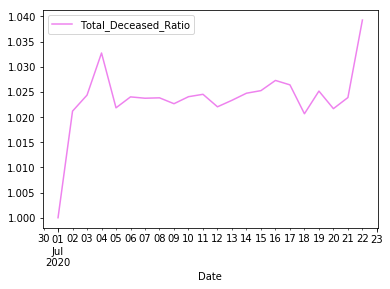

In [27]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    datajly_ratio.plot(x="Date",y=i,color=j)